In [71]:
import pandas as pd

In [182]:
import matplotlib.pyplot as plt

In [210]:
sheet1 = pd.read_excel('E:/data analyst/ML/stones2milestones/assignment_data.xlsx', sheet_name = 'Interested Users') 
sheet1.head(3)

,Child name,phone,email_id,school,grade,batch_preferred,source,Submitted At
0,CH_30001,911100221000,s2m_test_20001@tests2m.com,St.paul's school,Grade 2,"Afternoon Batch (4:00 - 4:45 PM), Evening Batc...",lastchance,2020-04-16 08:46:39
1,CH_30002,911100221001,s2m_test_20002@tests2m.com,K L E School haveri,Grade 4,"Evening Batch (6:15 - 7:00 PM), Morning Batch ...",lastchance,2020-04-16 08:47:55
2,CH_30003,911100221002,s2m_test_20003@tests2m.com,Delhu Public School Howrah,Grade 2,"Morning Batch (11:15 - 12:00 PM), Evening Batc...",lastchance,2020-04-16 08:47:59


In [75]:
sheet = []

sheet.append(sheet1)
sheet2 = pd.read_excel('E:/data analyst/ML/stones2milestones/assignment_data.xlsx', sheet_name = 'Booked Users')
sheet.append(sheet2)

sheet3 = pd.read_excel('E:/data analyst/ML/stones2milestones/assignment_data.xlsx', sheet_name = 'Trainers')
sheet.append(sheet3)

sheet4 = pd.read_excel('E:/data analyst/ML/stones2milestones/assignment_data.xlsx', sheet_name = 'Subscription Bought') 
sheet.append(sheet4)

### 5. Sales conversion w.r.t Grade

In [87]:
sheet4.info

<bound method DataFrame.info of     Child Name  Registered Number         Registered Email ID  \
0     CH_31846       9.111002e+11  s2m_test_21890@tests2m.com   
1     CH_31847       9.111002e+11                         NaN   
2     CH_31848       9.111002e+11  s2m_test_21891@tests2m.com   
3     CH_31849       9.111002e+11  s2m_test_21440@tests2m.com   
4     CH_31850       9.111002e+11  s2m_test_21892@tests2m.com   
..         ...                ...                         ...   
413   CH_32081       9.111002e+11  s2m_test_22161@tests2m.com   
414   CH_32082       9.111002e+11  s2m_test_22162@tests2m.com   
415   CH_31831       9.111002e+11  s2m_test_21876@tests2m.com   
416   CH_32079       9.111002e+11  s2m_test_22158@tests2m.com   
417   CH_32083       9.111002e+11  s2m_test_21404@tests2m.com   

               Payment date  Sale by Grade Pricing   Duration  \
0    16-03-2020 12:00:00 AM  SP_1001     2     199        0.5   
1    16-03-2020 12:00:00 AM  SP_1002     4     199       

In [88]:
sheet4.isna().sum()

Child Name               78
Registered Number         4
Registered Email ID      21
Payment date              0
Sale by                 160
Grade                    19
Pricing                   0
Duration                 42
Sessions preferred      180
Live session details    201
dtype: int64

In [89]:
sheet4.count()

Child Name              340
Registered Number       414
Registered Email ID     397
Payment date            418
Sale by                 258
Grade                   399
Pricing                 418
Duration                376
Sessions preferred      238
Live session details    217
dtype: int64

In [96]:
sheet4.dtypes

Child Name               object
Registered Number       float64
Registered Email ID      object
Payment date             object
Sale by                  object
Grade                    object
Pricing                  object
Duration                 object
Sessions preferred       object
Live session details     object
dtype: object

In [113]:
# multichild = sheet4['Pricing'].apply(lambda x: fail if x == 'MultiChild' else Pass)
# multichild

sheet4['Pricing'].str[0:3] == 'Multichild'

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Pricing, Length: 418, dtype: bool

In [117]:
"Find Pricing equals to Multichild "

child = sheet4[sheet4['Pricing'].str[0:3] == 'Mul']
child

,Child Name,Registered Number,Registered Email ID,Payment date,Sale by,Grade,Pricing,Duration,Sessions preferred,Live session details
104,CH_31902,9.111002e+11,s2m_test_21946@tests2m.com,27-03-2020 12:00:00 AM,SP_1006,4,Multichild,8G,NaN,Live - Upsell (Larger plan)
352,CH_30835,9.111002e+11,s2m_test_20829@tests2m.com,22-04-2020 2:39:45 PM,SP_1012,4,Multichild,NaN,Assigned,Live - Upsell (Larger plan)
363,CH_32013,9.111002e+11,s2m_test_21022@tests2m.com,23-04-2020 5:49:24 PM,SP_1005,5,Multichild,10G+1yr,Assigned,NaN
398,CH_31412,NaN,s2m_test_20670@tests2m.com,26-04-2020 12:00:00 AM,SP_1001,NaN,Multichild,12G + 1yr,Assigned,NaN
406,CH_32077,9.111002e+11,s2m_test_21083@tests2m.com,2020-04-27 00:00:00,SP_1009,3,Multichild,12G+1tr +assesment,Assigned,NaN


In [128]:
"identify and remove it"
sheet4[sheet4['Pricing'] == '95381 45678']


,Child Name,Registered Number,Registered Email ID,Payment date,Sale by,Grade,Pricing,Duration,Sessions preferred,Live session details
250,CH_32008,9.111002e+11,s2m_test_22088@tests2m.com,2020-12-04 15:03:17,SP_1001,1,95381 45678,12G + 1y,SCJ/13042020/Batch 3,Live - Upsell (Larger plan)


In [129]:
# reset value of sheet4 without including multichild value

sheet4 = sheet4[sheet4['Pricing'].str[0:3] != 'Mul']

sheet4.head(3)


,Child Name,Registered Number,Registered Email ID,Payment date,Sale by,Grade,Pricing,Duration,Sessions preferred,Live session details
0,CH_31846,9.111002e+11,s2m_test_21890@tests2m.com,16-03-2020 12:00:00 AM,SP_1001,2,199,0.5,NaN,NaN
1,CH_31847,9.111002e+11,NaN,16-03-2020 12:00:00 AM,SP_1002,4,199,0.5,NaN,NaN
2,CH_31848,9.111002e+11,s2m_test_21891@tests2m.com,16-03-2020 12:00:00 AM,NaN,4,199,0.5,NaN,NaN


In [133]:
sheet4 = sheet4[sheet4['Pricing']!= '95381 45678']
sheet4.head(3)

,Child Name,Registered Number,Registered Email ID,Payment date,Sale by,Grade,Pricing,Duration,Sessions preferred,Live session details
0,CH_31846,9.111002e+11,s2m_test_21890@tests2m.com,16-03-2020 12:00:00 AM,SP_1001,2,199,0.5,NaN,NaN
1,CH_31847,9.111002e+11,NaN,16-03-2020 12:00:00 AM,SP_1002,4,199,0.5,NaN,NaN
2,CH_31848,9.111002e+11,s2m_test_21891@tests2m.com,16-03-2020 12:00:00 AM,NaN,4,199,0.5,NaN,NaN


In [136]:
sheet4.count()

Child Name              334
Registered Number       409
Registered Email ID     391
Payment date            412
Sale by                 252
Grade                   394
Pricing                 412
Duration                371
Sessions preferred      233
Live session details    214
dtype: int64

In [139]:
"changing data type of pricing"
sheet4['Pricing'].astype('int32')
sheet4.dtypes

Child Name               object
Registered Number       float64
Registered Email ID      object
Payment date             object
Sale by                  object
Grade                    object
Pricing                  object
Duration                 object
Sessions preferred       object
Live session details     object
dtype: object

In [149]:
"pricing value should be more than 499"

sheet4['sales'] = sheet4['Pricing'].apply(lambda x: True if x >= 499 else False)

sheet4[sheet4['sales']==True].count()


Child Name              259
Registered Number       267
Registered Email ID     250
Payment date            270
Sale by                 249
Grade                   259
Pricing                 270
Duration                263
Sessions preferred      231
Live session details    214
sales                   270
dtype: int64

In [153]:
table4 = sheet4[sheet4['sales']==True]

table4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 12 to 417
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Child Name            259 non-null    object 
 1   Registered Number     267 non-null    float64
 2   Registered Email ID   250 non-null    object 
 3   Payment date          270 non-null    object 
 4   Sale by               249 non-null    object 
 5   Grade                 259 non-null    object 
 6   Pricing               270 non-null    object 
 7   Duration              263 non-null    object 
 8   Sessions preferred    231 non-null    object 
 9   Live session details  214 non-null    object 
 10  sales                 270 non-null    bool   
dtypes: bool(1), float64(1), object(9)
memory usage: 23.5+ KB


In [178]:
"the data is modified in place, which means it will return nothing and the dataframe is now updated"

table4.drop(columns = ['Live session details','Duration','Sessions preferred','Sale by'],inplace = True)
table4

c:\users\amit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Child Name,Registered Number,Registered Email ID,Payment date,Grade,Pricing,sales
12,CH_31858,9.111002e+11,s2m_test_21900@tests2m.com,18-03-2020 12:00:00 AM,2,999,True
15,CH_31860,9.111002e+11,s2m_test_21903@tests2m.com,18-03-2020 12:00:00 AM,4,1999,True
23,CH_31868,9.111002e+11,s2m_test_21911@tests2m.com,19-03-2020 12:00:00 AM,1,1999,True
27,CH_31872,9.111002e+11,s2m_test_21915@tests2m.com,19-03-2020 12:00:00 AM,2,1999,True
31,CH_31876,9.111002e+11,s2m_test_21919@tests2m.com,20-03-2020 12:00:00 AM,1,999,True
...,...,...,...,...,...,...,...
413,CH_32081,9.111002e+11,s2m_test_22161@tests2m.com,2020-04-27 00:00:00,2,1999,True
414,CH_32082,9.111002e+11,s2m_test_22162@tests2m.com,2020-04-27 00:00:00,3,1999,True
415,CH_31831,9.111002e+11,s2m_test_21876@tests2m.com,2020-04-27 00:00:00,3,1999,True
416,CH_32079,9.111002e+11,s2m_test_22158@tests2m.com,2020-04-27 00:00:00,2,1999,True


In [489]:
"checking unique values"
table4['Child Name'].is_unique

True

In [181]:
gb = table4.groupby('Grade').count()
gb

,Child Name,Registered Number,Registered Email ID,Payment date,Pricing,sales
Grade,,,,,,
1,41,43,40,43,43,43
2,62,64,57,64,64,64
3,65,66,60,66,66,66
4,79,77,75,79,79,79
5,4,4,4,4,4,4
6,1,1,1,1,1,1
Kg,1,1,1,1,1,1
Nursery,1,1,1,1,1,1


In [187]:
gb.index
gb.sales

Grade
1          43
2          64
3          66
4          79
5           4
6           1
Kg          1
Nursery     1
Name: sales, dtype: int64

## 4. Sales conversion with respect to Source

In [465]:
"checking duplicate index of sheet1"
sheet1.index.is_unique

"copying data of sheet1 into table1"
table1  = pd.DataFrame(sheet1)
print(sheet1.shape,table1.shape)

table1.drop_duplicates(subset= "Child name",inplace= True,keep = 'first')
"reseting index"
table1=table1.reset_index(drop =True)
print(table1.shape)
table1.head(3)

(1683, 8) (1683, 8)
(1439, 8)


,Child name,phone,email_id,school,grade,batch_preferred,source,Submitted At
0,CH_30001,911100221000,s2m_test_20001@tests2m.com,St.paul's school,Grade 2,"Afternoon Batch (4:00 - 4:45 PM), Evening Batc...",lastchance,2020-04-16 08:46:39
1,CH_30002,911100221001,s2m_test_20002@tests2m.com,K L E School haveri,Grade 4,"Evening Batch (6:15 - 7:00 PM), Morning Batch ...",lastchance,2020-04-16 08:47:55
2,CH_30003,911100221002,s2m_test_20003@tests2m.com,Delhu Public School Howrah,Grade 2,"Morning Batch (11:15 - 12:00 PM), Evening Batc...",lastchance,2020-04-16 08:47:59


In [445]:
"reset index of table4"

table4.reset_index(drop=True)
"check index duplicate"
print(table4.index.is_unique)
"drop duplicate in child column"
table4.drop_duplicates(subset = 'Child Name',inplace = True)

table4.shape

True


c:\users\amit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


(250, 7)

In [469]:
sh1 = table1.set_index('Child name')

#sheet1.groupby('source').count()
sh1.index.is_unique

True

In [307]:
def find_na(df):
    return dict({'Total of': df.count(),'Na value of': df.isna().sum()})
   
    

In [492]:
find_na(sheet1)

{'Total of': Child name         1683
 phone              1683
 email_id           1683
 school             1683
 grade              1683
 batch_preferred    1683
 source             1681
 Submitted At       1683
 dtype: int64,
 'Na value of': Child name         0
 phone              0
 email_id           0
 school             0
 grade              0
 batch_preferred    0
 source             2
 Submitted At       0
 dtype: int64}

In [452]:
# sheet1['Child name'].unique()
# "find repeated value"
# import collections

sh4=table4.set_index('Child Name')

print(sh4.index.is_unique)
sh4.head(3)

True


,Registered Number,Registered Email ID,Payment date,Grade,Pricing,sales
Child Name,,,,,,
CH_31858,9.111002e+11,s2m_test_21900@tests2m.com,18-03-2020 12:00:00 AM,2,999,True
CH_31860,9.111002e+11,s2m_test_21903@tests2m.com,18-03-2020 12:00:00 AM,4,1999,True
CH_31868,9.111002e+11,s2m_test_21911@tests2m.com,19-03-2020 12:00:00 AM,1,1999,True


In [470]:
print(sh1.shape,sh4.shape)


(1439, 7) (250, 6)


In [425]:
"check for duplicate values"
def check_duplicate(df):
    
    say = df.index.is_unique

    length = len(df.index.unique())
    shape = df.shape
    return print("is unique {},lenth of unique index {},total shape {}".format(say,length,shape))

"Remve duplicate values"
def drop_duplicate(df):
    
    return df.drop_duplicates(inplace=True)
    


In [495]:
# check_duplicate(sh1)
# check_duplicate(sh4)

# drop_duplicate(sh1)
# drop_duplicate(sh4)

"joining sh1 and sh4"
#sh1sh4 = pd.concat([sh1, sh4], axis=1, join='inner',copy =True)
sh1sh4 = pd.concat([sh1, sh4], axis=1).reindex(sh4.index)
sh1sh4


,phone,email_id,school,grade,batch_preferred,source,Submitted At,Registered Number,Registered Email ID,Payment date,Grade,Pricing,sales
Child Name,,,,,,,,,,,,,
CH_31858,NaN,NaN,NaN,NaN,NaN,NaN,NaT,9.111002e+11,s2m_test_21900@tests2m.com,18-03-2020 12:00:00 AM,2,999,True
CH_31860,NaN,NaN,NaN,NaN,NaN,NaN,NaT,9.111002e+11,s2m_test_21903@tests2m.com,18-03-2020 12:00:00 AM,4,1999,True
CH_31868,NaN,NaN,NaN,NaN,NaN,NaN,NaT,9.111002e+11,s2m_test_21911@tests2m.com,19-03-2020 12:00:00 AM,1,1999,True
CH_31872,NaN,NaN,NaN,NaN,NaN,NaN,NaT,9.111002e+11,s2m_test_21915@tests2m.com,19-03-2020 12:00:00 AM,2,1999,True
CH_31876,NaN,NaN,NaN,NaN,NaN,NaN,NaT,9.111002e+11,s2m_test_21919@tests2m.com,20-03-2020 12:00:00 AM,1,999,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
CH_32080,NaN,NaN,NaN,NaN,NaN,NaN,NaT,9.111002e+11,s2m_test_22160@tests2m.com,2020-04-27 00:00:00,3,1999,True
CH_32081,NaN,NaN,NaN,NaN,NaN,NaN,NaT,9.111002e+11,s2m_test_22161@tests2m.com,2020-04-27 00:00:00,2,1999,True
CH_32082,NaN,NaN,NaN,NaN,NaN,NaN,NaT,9.111002e+11,s2m_test_22162@tests2m.com,2020-04-27 00:00:00,3,1999,True


In [508]:
print(sh1sh4.shape)
"replace Nan valu with Unknown Source"
print(sh1sh4['source'].isna().sum())
sh1sh4['source']=sh1sh4['source'].fillna('unknown')
sh1sh4['source']

(250, 13)
199


Child Name
CH_31858    unknown
CH_31860    unknown
CH_31868    unknown
CH_31872    unknown
CH_31876    unknown
             ...   
CH_32080    unknown
CH_32081    unknown
CH_32082    unknown
CH_31831    unknown
CH_32083    unknown
Name: source, Length: 250, dtype: object

In [509]:
gb4=sh1sh4.groupby(sh1sh4.source).count()
gb4.sum()

phone                   51
email_id                51
school                  51
grade                   51
batch_preferred         51
Submitted At            51
Registered Number      247
Registered Email ID    230
Payment date           250
Grade                  247
Pricing                250
sales                  250
dtype: int64

In [510]:
gb4.sales

source
T1KRMSMS        4
TEB11SMS        5
TEB12SMS        3
TEB2ASMS        2
TEB3SMS         2
TEB4SMS         5
TEB5SMS         3
adarsh          1
b1rmsms         5
b2rmsms         1
lastchance      2
nlusms          1
ntfpush         4
ntfuiuser       2
rfmsms         11
unknown       199
Name: sales, dtype: int64

### 7. Time slot – attendance %

In [653]:
"copying sheet2 to table2"
table2 = pd.DataFrame(sheet2)
"droping unwanted table"
table2=table2.drop(columns=['Invitee UUID',' School','Facilitator UUID','Parent Email','Phone','Grade'])
table2.head(3)

,Batch,Enrolment Type,Child Name,Opted Start Time,Opted Start Date,Attendance
0,"fREADom Trial Class - Grades 1, 2 [I] 11:15am ...",Trial,CH_31440,16-04-2020 11:15:00,"11:15am - Thursday, April 16, 2020",Present
1,"fREADom Trial Class - Grades 1, 2 [I] 11:15am ...",Trial,CH_31441,16-04-2020 11:15:00,"11:15am - Thursday, April 16, 2020",Present
2,"fREADom Trial Class - Grades 1, 2 [I] 11:15am ...",Trial,CH_31442,16-04-2020 11:15:00,"11:15am - Thursday, April 16, 2020",Absent


In [645]:
table2['Batch'].dtype

dtype('O')

In [646]:
table2['Batch']=table2['Batch'].astype(str)
table2['Batch'].dtype

dtype('O')

In [655]:
"removing freedom from columns"
table2['Batch'] = table2['Batch'].str.strip('fREADom')

"removing class from columns"
# table2['Batch']=table2['Batch'].str.strip('Class')
# table2['Batch'][2]

new =table2['Batch'].str.split(pat =']',expand = True)



In [656]:
"creating new column grade from splitted row"
table2['Grades'] = new[0]
"Droping old column "
table2=table2.drop(columns='Batch')



In [657]:
new1 = table2['Grades'].str.split(pat ='[',expand = True)

table2['Tier']=new[1]
table2['Grade']=new[0]



In [658]:
"dropping extra column"
table2=table2.drop(columns='Grades')
table2=table2.drop(columns='Tier')

In [659]:
#new2= table2['Grade'].str.split(pat = '[',expand = True)
table2['trial']=new2[1]
#table2=table2.drop(columns=['Grade','tier'])
table2['Grades']=new2[0]
new3=table2['Grades'].str.split(pat='-',expand =True)
table2['Grade']=new3[1]
table2=table2.drop(columns='Grades')
table2.head(3)

,Enrolment Type,Child Name,Opted Start Time,Opted Start Date,Attendance,Grade,trial
0,Trial,CH_31440,16-04-2020 11:15:00,"11:15am - Thursday, April 16, 2020",Present,"Grades 1, 2",I
1,Trial,CH_31441,16-04-2020 11:15:00,"11:15am - Thursday, April 16, 2020",Present,"Grades 1, 2",I
2,Trial,CH_31442,16-04-2020 11:15:00,"11:15am - Thursday, April 16, 2020",Absent,"Grades 1, 2",I


In [635]:
from dateutil import parser

def convert_to_dt(s):
    try:
        return parser.parse(s)
    except Exception:
        return np.nan

In [701]:
table2['Opted Start Time']=table2['Opted Start Time'].apply(convert_to_dt)
table2

,Enrolment Type,Child Name,Opted Start Time,Opted Start Date,Attendance,Grade,trial
0,Trial,CH_31440,2020-04-16 11:15:00,"11:15am - Thursday, April 16, 2020",Present,"Grades 1, 2",I
1,Trial,CH_31441,2020-04-16 11:15:00,"11:15am - Thursday, April 16, 2020",Present,"Grades 1, 2",I
2,Trial,CH_31442,2020-04-16 11:15:00,"11:15am - Thursday, April 16, 2020",Absent,"Grades 1, 2",I
3,Trial,CH_31443,2020-04-16 11:15:00,"11:15am - Thursday, April 16, 2020",Absent,"Grades 3, 4",I
4,Trial,CH_31444,2020-04-16 11:15:00,"11:15am - Thursday, April 16, 2020",Present,"Grades 3, 4",I
...,...,...,...,...,...,...,...
1706,Trial,CH_31382,2020-04-27 18:00:00,"06:00pm - Monday, April 27, 2020",NaN,"Grades 1,2",III
1707,Trial,CH_31347,2020-04-27 18:00:00,"06:00pm - Monday, April 27, 2020",NaN,"Grades 1,2",III
1708,Trial,CH_31346,2020-04-27 18:00:00,"06:00pm - Monday, April 27, 2020",NaN,"Grades 1,2",III
1709,Trial,CH_31315,2020-04-27 18:00:00,"06:00pm - Monday, April 27, 2020",NaN,"Grades 1,2",III


In [702]:
"drop unnecessary columns"
#table2=table2.drop(columns=['Enrolment Type','Opted Start Date'])
table2.head(3)

,Child Name,Opted Start Time,Attendance,Grade,trial
0,CH_31440,2020-04-16 11:15:00,Present,"Grades 1, 2",I
1,CH_31441,2020-04-16 11:15:00,Present,"Grades 1, 2",I
2,CH_31442,2020-04-16 11:15:00,Absent,"Grades 1, 2",I


In [710]:
table2['present'] = table2['Attendance'].apply(lambda x: True if x =='Present' else False)
table2



,Child Name,Opted Start Time,Attendance,Grade,trial,present
0,CH_31440,2020-04-16 11:15:00,Present,"Grades 1, 2",I,True
1,CH_31441,2020-04-16 11:15:00,Present,"Grades 1, 2",I,True
2,CH_31442,2020-04-16 11:15:00,Absent,"Grades 1, 2",I,False
3,CH_31443,2020-04-16 11:15:00,Absent,"Grades 3, 4",I,False
4,CH_31444,2020-04-16 11:15:00,Present,"Grades 3, 4",I,True
...,...,...,...,...,...,...
1706,CH_31382,2020-04-27 18:00:00,NaN,"Grades 1,2",III,False
1707,CH_31347,2020-04-27 18:00:00,NaN,"Grades 1,2",III,False
1708,CH_31346,2020-04-27 18:00:00,NaN,"Grades 1,2",III,False
1709,CH_31315,2020-04-27 18:00:00,NaN,"Grades 1,2",III,False


In [714]:
gb22 =table2.groupby(['Opted Start Time','present']).count()

gb22.head(4)

Child Name  Attendance  Grade  trial
Opted Start Time    present                                      
2020-04-16 11:15:00 False            18          17     18     18
                    True             20          20     20     20
2020-04-16 16:00:00 False            10          10     10     10
                    True             31          31     31     31

In [717]:
gb22.Attendance

Opted Start Time     present
2020-04-16 11:15:00  False      17
                     True       20
2020-04-16 16:00:00  False      10
                     True       31
2020-04-16 18:15:00  False      27
                     True       38
2020-04-17 11:15:00  False      11
                     True       13
2020-04-17 16:00:00  False      19
                     True       22
2020-04-17 18:15:00  False      16
                     True       38
2020-04-18 11:15:00  False      25
                     True       29
2020-04-18 16:00:00  False      35
                     True       29
2020-04-18 18:15:00  False      17
                     True       42
2020-04-19 11:15:00  False      23
                     True       45
2020-04-19 16:00:00  False      19
                     True       44
2020-04-19 18:15:00  False      21
                     True       31
2020-04-20 11:45:00  False      40
                     True       38
2020-04-20 18:00:00  False      41
                     True 

In [666]:
"checking Trainer Name"
sheet3[sheet3['Trainer Name'].str[0:3]=='CAN']

"removing Cancelled"
table3 = sheet3[sheet3['Trainer Name'].str[0:3]!='CAN']
table3


,Trainer Name,Date,Timing,Grade,Batch size,Batch count,Batch,Topics
0,FAC_5001,16 April Thursday,11.15 am - 12 noon,"Grade 1,2",group,9.0,trial I,Rocking with rhymes
1,FAC_5002,16 April Thursday,11.15 am - 12 noon,"Grade 3,4",group,9.0,trial I,In my mind's eye
2,FAC_5003,16 April Thursday,11.15 am - 12 noon,"Grade 1,2",group,9.0,trial II,Word Whiz
3,FAC_5006,16 April Thursday,11.15 am - 12 noon,"Grade 3,4",group,7.0,trial II,Rocking with rhymes
4,FAC_5007,16 April Thursday,4:00-4:45 pm,"Grade 3,4",group,9.0,trial I,In my head or real
...,...,...,...,...,...,...,...,...
169,FAC_5009,27 April Monday,6.00 pm - 6.45 pm,"Grade 3,4",NaN,NaN,Trial IV,Emotional energy
170,FAC_5040,27 April Monday,6.00 pm - 6.45 pm,"Grade 1,2",NaN,NaN,Trial IV,In my mind's eye
171,FAC_5038,27 April Monday,6.00 pm - 6.45 pm,"Grade 3,4",NaN,NaN,Trial II,Play with Punctuation
172,FAC_5002,27 April Monday,6.00 pm - 6.45 pm,"Grade 1,2",NaN,NaN,Trial II,Word Whiz


In [687]:
new_table3 = pd.DataFrame(table3[['Date','Timing']])

# a.to_frame().join(b
abc =new_table3['Date'].to_frame().join(new_table3['Timing'])
# new_table3
abc
new_table3
new_table3['Time']=new_table3['Date'] +str(" ")+ new_table3['Timing']
new_table3


,Date,Timing,Time
0,16 April Thursday,11.15 am - 12 noon,16 April Thursday 11.15 am - 12 noon
1,16 April Thursday,11.15 am - 12 noon,16 April Thursday 11.15 am - 12 noon
2,16 April Thursday,11.15 am - 12 noon,16 April Thursday 11.15 am - 12 noon
3,16 April Thursday,11.15 am - 12 noon,16 April Thursday 11.15 am - 12 noon
4,16 April Thursday,4:00-4:45 pm,16 April Thursday 4:00-4:45 pm
...,...,...,...
169,27 April Monday,6.00 pm - 6.45 pm,27 April Monday 6.00 pm - 6.45 pm
170,27 April Monday,6.00 pm - 6.45 pm,27 April Monday 6.00 pm - 6.45 pm
171,27 April Monday,6.00 pm - 6.45 pm,27 April Monday 6.00 pm - 6.45 pm
172,27 April Monday,6.00 pm - 6.45 pm,27 April Monday 6.00 pm - 6.45 pm


In [700]:
new_table3['Time'].apply(convert_to_dt)

nw1=new_table3['Time'].str.split(pat='-',expand = True)
new_table3['Time slot']=nw1[0]

new_table3['Time slot']=new_table3['Time slot'].apply(convert_to_dt)

new_table3

,Date,Timing,Time,Time slot
0,16 April Thursday,11.15 am - 12 noon,16 April Thursday 11.15 am - 12 noon,2020-04-16 11:00:00
1,16 April Thursday,11.15 am - 12 noon,16 April Thursday 11.15 am - 12 noon,2020-04-16 11:00:00
2,16 April Thursday,11.15 am - 12 noon,16 April Thursday 11.15 am - 12 noon,2020-04-16 11:00:00
3,16 April Thursday,11.15 am - 12 noon,16 April Thursday 11.15 am - 12 noon,2020-04-16 11:00:00
4,16 April Thursday,4:00-4:45 pm,16 April Thursday 4:00-4:45 pm,2020-04-16 04:00:00
...,...,...,...,...
169,27 April Monday,6.00 pm - 6.45 pm,27 April Monday 6.00 pm - 6.45 pm,2020-04-27 18:00:00
170,27 April Monday,6.00 pm - 6.45 pm,27 April Monday 6.00 pm - 6.45 pm,2020-04-27 18:00:00
171,27 April Monday,6.00 pm - 6.45 pm,27 April Monday 6.00 pm - 6.45 pm,2020-04-27 18:00:00
172,27 April Monday,6.00 pm - 6.45 pm,27 April Monday 6.00 pm - 6.45 pm,2020-04-27 18:00:00


## Data Visualization

### 5. Sales Conversion w.r.t Grade

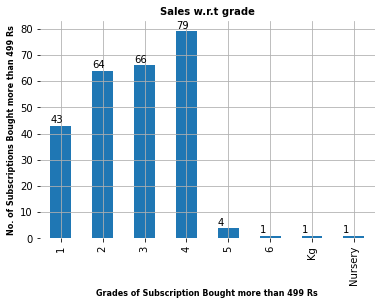

In [269]:
ax=gb['sales'].plot(kind='bar')

plt.title("Sales w.r.t grade",fontweight = 'bold',fontsize = 10)

plt.xlabel("Grades of Subscription Bought more than 499 Rs",fontweight = 'bold',fontsize =8)
plt.ylabel("No. of Subscriptions Bought more than 499 Rs",fontweight = 'bold',fontsize = 8)

"remove border of graph"
for spine in plt.gca().spines.values():
    spine.set_visible(False)

"add value on top of bar"
for p in ax.patches:
    
    width,height = p.get_width(),p.get_height()
    #print(width,height)
    x,y = p.get_xy()
    ax.annotate('{}'.format(height),(x,y+height+1))
    

plt.grid()
plt.show()

### 4. Sales conversion with respect to Source

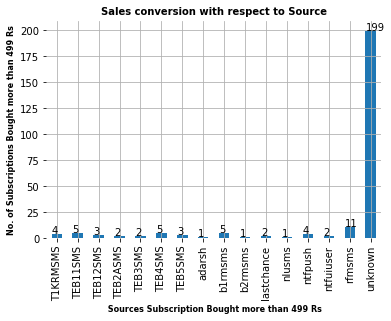

In [511]:
ax= gb4['sales'].plot(kind='bar')

plt.title("Sales conversion with respect to Source",fontweight = 'bold',fontsize = 10)

plt.xlabel(" Sources Subscription Bought more than 499 Rs",fontweight = 'bold',fontsize =8)
plt.ylabel("No. of Subscriptions Bought more than 499 Rs",fontweight = 'bold',fontsize = 8)

"remove border of graph"
for spine in plt.gca().spines.values():
    spine.set_visible(False)

"add value on top of bar"
for p in ax.patches:
    
    width,height = p.get_width(),p.get_height()
    #print(width,height)
    x,y = p.get_xy()
    ax.annotate('{}'.format(height),(x,y+height+0.1))
    

plt.grid()
plt.show()

 Unknown are those sources which are not mention in interested User but they have bought sibscription 

### 7. Time slot – attendance 

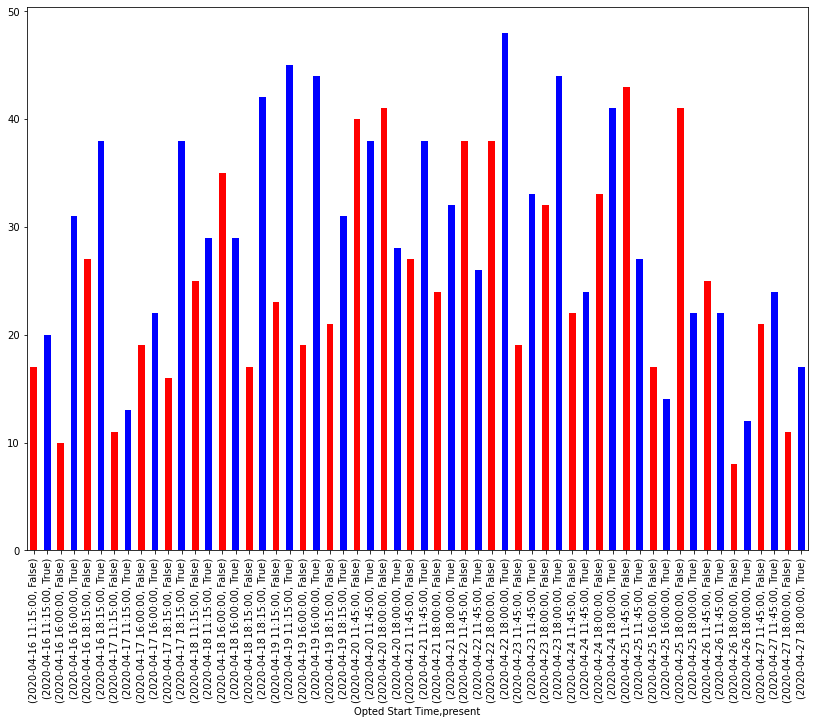

In [726]:
plt.figure(figsize=(14,10))

gb22['Attendance'].plot(kind='bar',color=['red','blue'])


plt.show()

In [270]:
a=sheet3.info()

b=sheet3.count()

"checking missing value"
sheet3.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Trainer Name  173 non-null    object 
 1   Date          174 non-null    object 
 2   Timing        174 non-null    object 
 3   Grade         174 non-null    object 
 4   Batch size    160 non-null    object 
 5   Batch count   159 non-null    float64
 6   Batch         174 non-null    object 
 7   Topics        174 non-null    object 
dtypes: float64(1), object(7)
memory usage: 11.0+ KB


Trainer Name     1
Date             0
Timing           0
Grade            0
Batch size      14
Batch count     15
Batch            0
Topics           0
dtype: int64

In [219]:
sheet3[sheet3.isna().any(axis=1)]

,Trainer Name,Date,Timing,Grade,Batch size,Batch count,Batch,Topics
28,NaN,18 April Saturday,11.15 am - 12 noon,"Grade 1,2",group,9.0,trial I,Word Whiz
127,FAC_5040,24 April Friday,6.00 pm - 6.45 pm,"Grade 3,4",group,NaN,Trial II,Storm in my brain
160,FAC_5019,27 April Monday,11.45 am -12.30 pm,"Grade 1,2",NaN,NaN,Trial I,Category Spin
161,FAC_5006,27 April Monday,11.45 am -12.30 pm,"Grade 3,4",NaN,NaN,Trial I,In my head or real?
162,FAC_5052,27 April Monday,11.45 am -12.30 pm,"Grade 3,4",NaN,NaN,Trial II,Name it
163,FAC_5008,27 April Monday,11.45 am -12.30 pm,"Grade 1,2",NaN,NaN,Trial II,In my mind's eye
164,FAC_5002,27 April Monday,11.45 am -12.30 pm,"Grade 3,4",NaN,NaN,Trial III,In my mind's eye
165,FAC_5053,27 April Monday,11.45 am -12.30 pm,"Grade 1,2",NaN,NaN,Trial IV,Contract it
166,CANCELLED,27 April Monday,11.45 am -12.30 pm,"Grade 3,4",NaN,NaN,Trial IV,Play with Punctuation
167,FAC_5028,27 April Monday,6.00 pm - 6.45 pm,"Grade 1,2",NaN,NaN,Trial I,Structure of a story


In [241]:
# table3['Grade']=table3['Grade'].str.strip('Grade').str.split(',').explode()

# table3

#### Groupby Practice

In [266]:
gb1=sheet1.groupby('source')

gb1.get_group("lastchance").set_index("Child name").head()



,phone,email_id,school,grade,batch_preferred,source,Submitted At
Child name,,,,,,,
CH_30001,911100221000,s2m_test_20001@tests2m.com,St.paul's school,Grade 2,"Afternoon Batch (4:00 - 4:45 PM), Evening Batc...",lastchance,2020-04-16 08:46:39
CH_30002,911100221001,s2m_test_20002@tests2m.com,K L E School haveri,Grade 4,"Evening Batch (6:15 - 7:00 PM), Morning Batch ...",lastchance,2020-04-16 08:47:55
CH_30003,911100221002,s2m_test_20003@tests2m.com,Delhu Public School Howrah,Grade 2,"Morning Batch (11:15 - 12:00 PM), Evening Batc...",lastchance,2020-04-16 08:47:59
CH_30004,911100221003,s2m_test_20004@tests2m.com,Bharathi vidya bhavans,Grade 2,"Evening Batch (6:15 - 7:00 PM), Afternoon Batc...",lastchance,2020-04-16 08:48:27
CH_30005,911100221004,s2m_test_20005@tests2m.com,Army public school Delhi cantt,Grade 4,"Evening Batch (6:15 - 7:00 PM), Afternoon Batc...",lastchance,2020-04-16 08:52:06


In [331]:
gb2 = sheet1.groupby(sheet1.source)

"Computed first of values within each group"
gb2.first().head()




,Child name,phone,email_id,school,grade,batch_preferred,Submitted At
source,,,,,,,
T1KRMSMS,CH_30340,911100221327,s2m_test_20329@tests2m.com,DPS MEGACITY,Grade 3,"Morning Batch (11:15 - 12:00 PM), Afternoon Ba...",2020-04-17 12:03:15
TEB11SMS,CH_30024,911100221024,s2m_test_20025@tests2m.com,SBOA school and junior college,Grade 1,"Morning Batch (11:15 - 12:00 PM), Afternoon Ba...",2020-04-16 10:34:24
TEB12SMS,CH_30027,911100221027,s2m_test_20028@tests2m.com,Kampala niketan,Grade 2,"Morning Batch (11:15 - 12:00 PM), Evening Batc...",2020-04-16 10:36:01
TEB2ASMS,CH_30219,911100221210,s2m_test_20212@tests2m.com,Don Bosco school,Grade 2,"Afternoon Batch (4:00 - 4:45 PM), Evening Batc...",2020-04-17 05:03:51
TEB2BSMS,CH_30228,911100221219,s2m_test_20221@tests2m.com,Kamala niketan school,Grade 3,"Morning Batch (11:15 - 12:00 PM), Evening Batc...",2020-04-17 05:06:03


### Time Date Tutorial